<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/moving_averages_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [2]:
netflix = web.get_data_yahoo("NFLX",start = "2011-01-01",end = "2020-03-01")
netflix.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-24,372.820007,361.000000,364.760010,368.700012,6936400.0,368.700012
2020-02-25,375.649994,357.720001,372.000000,360.089996,6481200.0,360.089996
2020-02-26,382.000000,365.000000,366.309998,379.239990,8934100.0,379.239990
2020-02-27,391.559998,370.600006,371.459991,371.709991,10967700.0,371.709991
2020-02-28,376.769989,356.799988,364.209991,369.029999,11168600.0,369.029999


In [3]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=netflix.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = netflix['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = netflix['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals.loc[signals['positions'] == 1.0])
print(signals.loc[signals['positions'] == -1.0])

            signal  short_mavg   long_mavg  positions
Date                                                 
2011-03-02     1.0   29.479179   29.381812        1.0
2012-02-10     1.0   13.583143   13.549286        1.0
2012-11-13     1.0    9.435393    9.431528        1.0
2014-06-26     1.0   56.527679   56.407643        1.0
2015-02-17     1.0   55.423393   55.369771        1.0
2015-11-20     1.0  108.103250  108.021086        1.0
2016-09-06     1.0   94.535750   94.479200        1.0
2019-02-14     1.0  316.541251  314.363000        1.0
2019-12-10     1.0  293.856248  293.818998        1.0
            signal  short_mavg   long_mavg  positions
Date                                                 
2011-09-02     0.0   35.777679   35.928314       -1.0
2012-05-09     0.0   14.486714   14.520514       -1.0
2014-04-28     0.0   54.368250   54.752743       -1.0
2014-10-24     0.0   63.458464   63.517329       -1.0
2015-10-21     0.0  104.312251  104.343614       -1.0
2016-02-05     0.0  108.9117

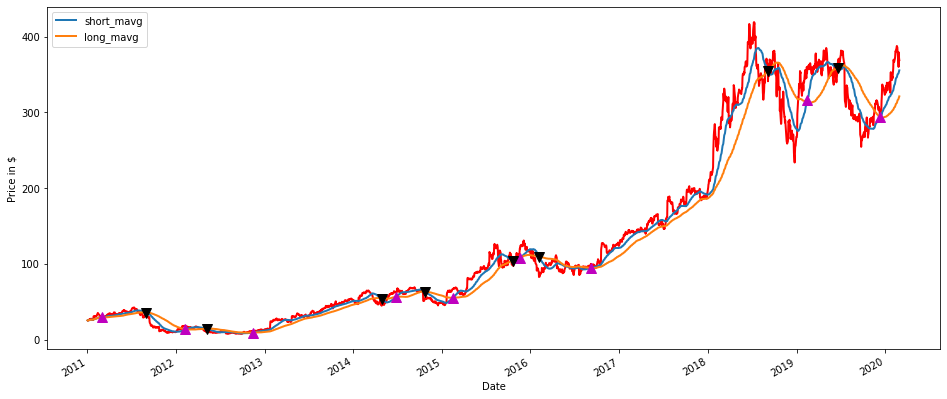

In [4]:
# Initialize the plot figure
fig = plt.figure(figsize=(16,7))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
netflix['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

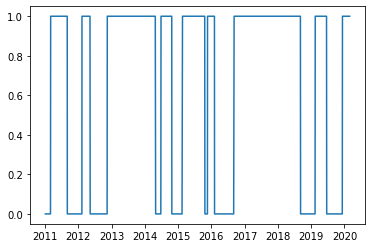

In [5]:
plt.plot(signals['signal'])

In [6]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['NFLX'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(netflix['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(netflix['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(netflix['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail())

                    NFLX      holdings          cash          total   returns
Date                                                                         
2020-02-24  36870.001221  36870.001221  96906.426907  133776.428127 -0.008428
2020-02-25  36008.999634  36008.999634  96906.426907  132915.426540 -0.006436
2020-02-26  37923.999023  37923.999023  96906.426907  134830.425930  0.014408
2020-02-27  37170.999146  37170.999146  96906.426907  134077.426052 -0.005585
2020-02-28  36902.999878  36902.999878  96906.426907  133809.426785 -0.001999


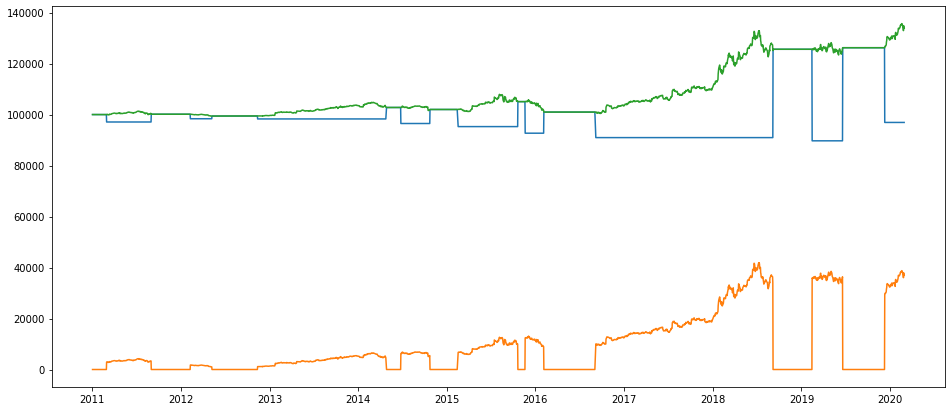

In [18]:
fig = plt.figure(figsize=(16,7))
plt.plot(portfolio['cash'])
plt.plot(portfolio['holdings'])
plt.plot(portfolio['total'])

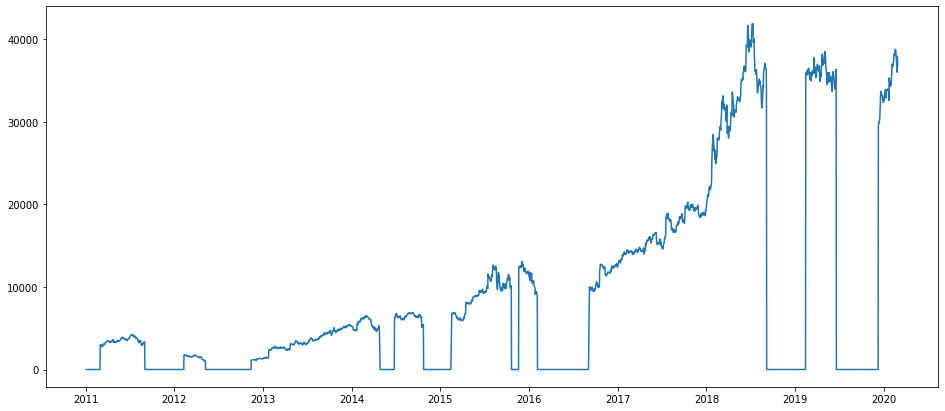

In [13]:
fig = plt.figure(figsize=(16,7))
plt.plot(portfolio['holdings'])

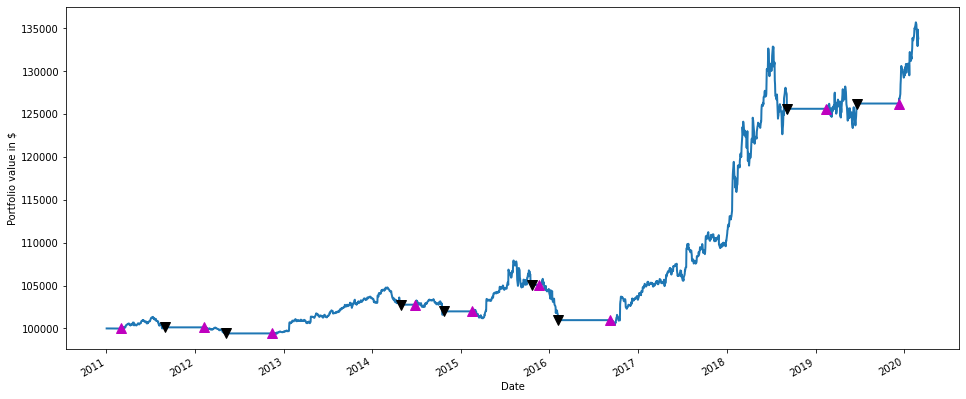

In [8]:
# Create a figure
fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

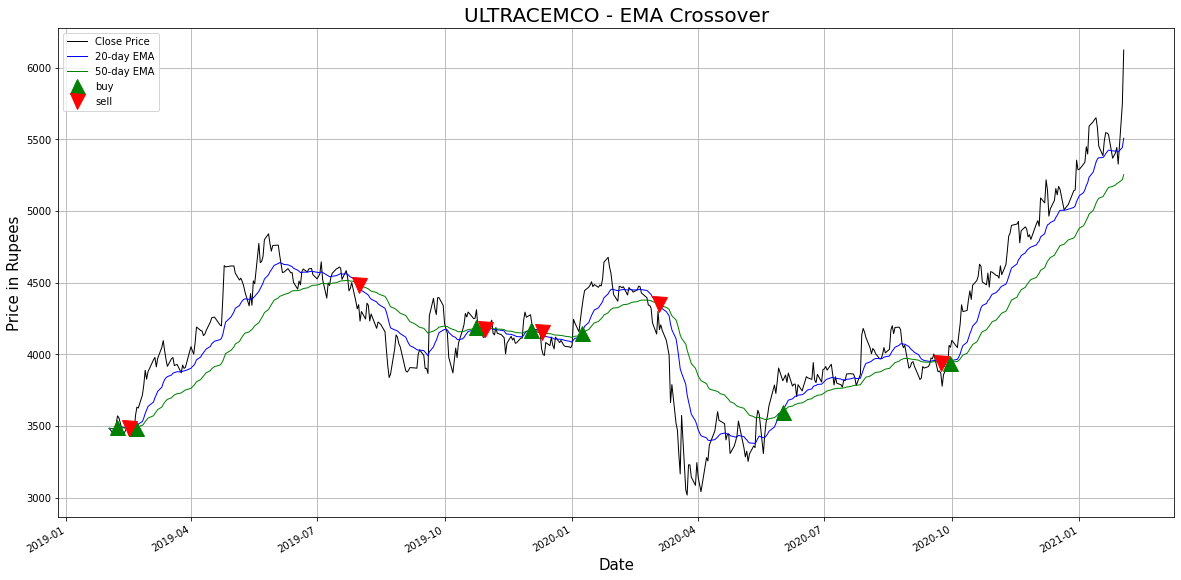

In [29]:
# set start and end dates
start = datetime.datetime(2019, 2, 1)
end = datetime.datetime(2021, 2, 1)
# extract the daily closing price data
ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ultratech_df['Position'] = ultratech_df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color ='g', label = 'buy')
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()